In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import history

# Post Processing Overview

This notebook demonstrates preliminary tools to gain an overview of submissions to the HISTORY experiment.  
The notebook also includes some function to visualize and compare instrinsic and extrinsic aerial camera model values.

### Define parent folder with all compressed submissions

In [3]:
data_dir = '/Volumes/backup/data/history/submissions/data'

### Uncompress all submissions

In [4]:
history.postprocessing.io.uncompress_all_submissions(data_dir,
                                                     dry_run=False,
                                                     overwrite=False,
                                                     verbose=True);

Found 8 archive files
/Volumes/backup/data/history/submissions/data/ESM_project_HISTORY_submission.zip
/Volumes/backup/data/history/submissions/data/HIATUS_CG_AI_PP_CY_PN_MN.zip
/Volumes/backup/data/history/submissions/data/HIATUS_CG_AI_PP_CY_PN_MY.zip
/Volumes/backup/data/history/submissions/data/HISTORY.zip
/Volumes/backup/data/history/submissions/data/HSfM_CG_AI_PP_CY_GY_PY_MN.tgz
/Volumes/backup/data/history/submissions/data/HSfM_IL_AI_PP_CY_GY_PN_MN.tgz
/Volumes/backup/data/history/submissions/data/MicMac_CG.zip
/Volumes/backup/data/history/submissions/data/_Files_lpierm_CG_AI_PP.7z

Disk space analysis:
  Available space: 1956.2 GB
  Archive size: 39.6 GB
  Estimated extracted size: 158.5 GB
Sufficient disk space available

Skipping ESM_project_HISTORY_submission.zip - already extracted
Skipping HIATUS_CG_AI_PP_CY_PN_MN.zip - already extracted
Skipping HIATUS_CG_AI_PP_CY_PN_MY.zip - already extracted
Skipping HISTORY.zip - already extracted
Skipping HSfM_CG_AI_PP_CY_GY_PY_MN.tgz 

### Recursively analyse the files
- Has some issues when mandatory file sets are not named consistently in a given submission directory. Duplicate entries may be created in these instances. Can be resolved by manually ensuring mandatory files that belong together are named with the same consistent scheme.

In [5]:
summary_df, files_dict = history.postprocessing.io.analyze_submissions(data_dir)
summary_df

,submission_name,author,adjusted_experiment_code,site,dataset,images,calibration,gcp,coregistration,multi-temporal,sparse_pointcloud_file_found,dense_pointcloud_file_found,extrinsics_file_found,intrinsics_file_found
0,ESM_project_HISTORY_submission,ESM,ESM_CG_AI_RA_CY_GY_PN_MN,Casa Grande,Aerial,Raw,Yes,Yes,No,No,True,True,True,True
1,ESM_project_HISTORY_submission,ESM,ESM_IL_AI_PP_CN_GY_PN_MN,Iceland,Aerial,Pre-processed,No,Yes,No,No,True,True,True,True
2,ESM_project_HISTORY_submission,ESM,ESM_IL_AI_RA_CN_GY_PN_MN,Iceland,Aerial,Raw,No,Yes,No,No,True,True,True,True
3,ESM_project_HISTORY_submission,ESM,ESM_IL_AI_RA_CY_GY_PN_MN,Iceland,Aerial,Raw,Yes,Yes,No,No,True,True,True,True
4,ESM_project_HISTORY_submission,ESM,ESM_CG_AI_PP_CN_GY_PN_MN,Casa Grande,Aerial,Pre-processed,No,Yes,No,No,True,True,True,True
5,ESM_project_HISTORY_submission,ESM,ESM_CG_AI_RA_CN_GY_PN_MN,Casa Grande,Aerial,Raw,No,Yes,No,No,True,True,True,True
6,HIATUS_CG_AI_PP_CY_PN_MN,HIATUS,HIATUS_CG_AI_PP_CY_XX_PN_MN,Casa Grande,Aerial,Pre-processed,Yes,Unknown,No,No,True,True,False,False
7,HIATUS_CG_AI_PP_CY_PN_MN,HIATUS,HIATUS_CG_AI_PP_CY_XX_PN_MY,Casa Grande,Aerial,Pre-processed,Yes,Unknown,No,Yes,False,False,True,True
8,HIATUS_CG_AI_PP_CY_PN_MY,HIATUS,HIATUS_CG_AI_PP_CY_XX_PN_MY,Casa Grande,Aerial,Pre-processed,Yes,Unknown,No,Yes,True,True,True,True
9,HISTORY,TUW,TUW_CG_AI_PP_CN_GN_PN_MN,Casa Grande,Aerial,Pre-processed,No,No,No,No,True,True,True,False


In [6]:
# summary_df.to_csv('summary_df.csv',index=False)

### Extract intrinsics information
- If no file was found a warning is raised.

In [7]:
intrinsics_df = history.postprocessing.io.combine_intrinsics_files(files_dict)

In [8]:
# intrinsics_df

In [9]:
# intrinsics_df.to_csv('intrinsics_df.csv',index=False)

### Plot intrinsics information

#### Focal length spread

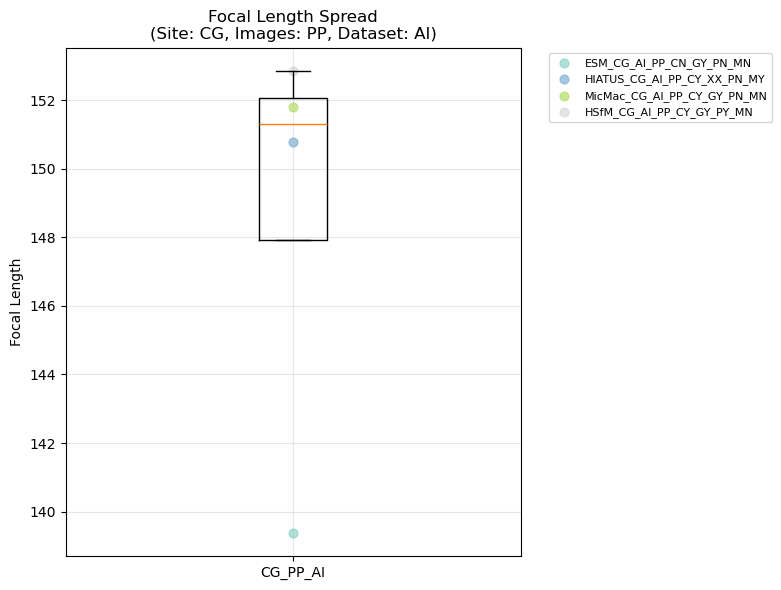

In [10]:
history.postprocessing.plotting.plot_focal_length_spread(intrinsics_df, site='CG', images='PP', dataset='AI')

#### Radial distortion
- There may be better ways to plot and represent the radial distortion parameters from the Brown-Conrady model, but this provides some preliminary comparison
- HIATUS may be using a different camera model
- Tangential distortion and cx,cy offsets could also be considered in the visualization, but are currently not included

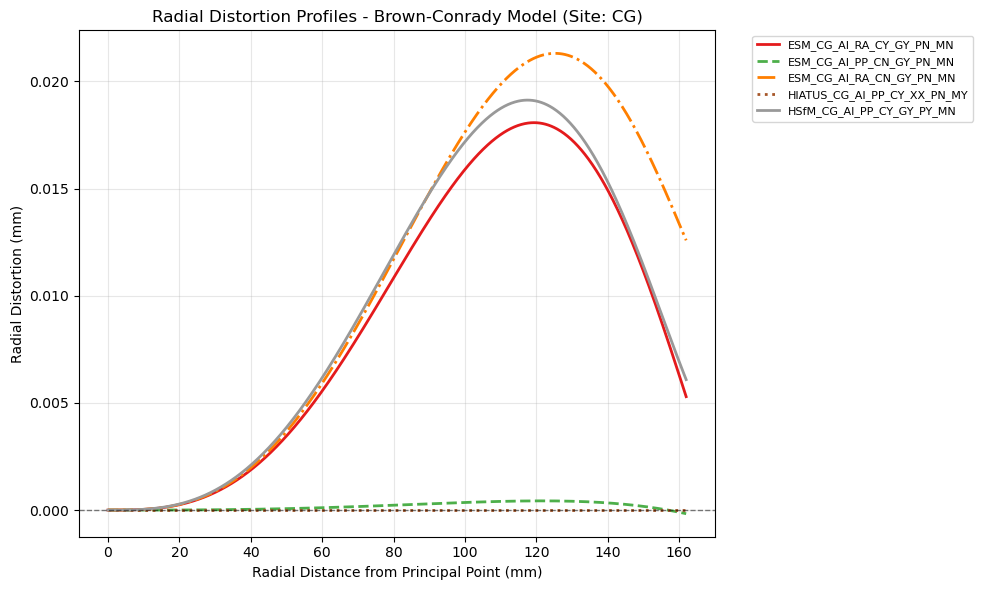

In [11]:
history.postprocessing.plotting.plot_distortion_profiles(intrinsics_df, site='CG', max_radius_mm = 162.0, log_scale=False, units = 'mm')

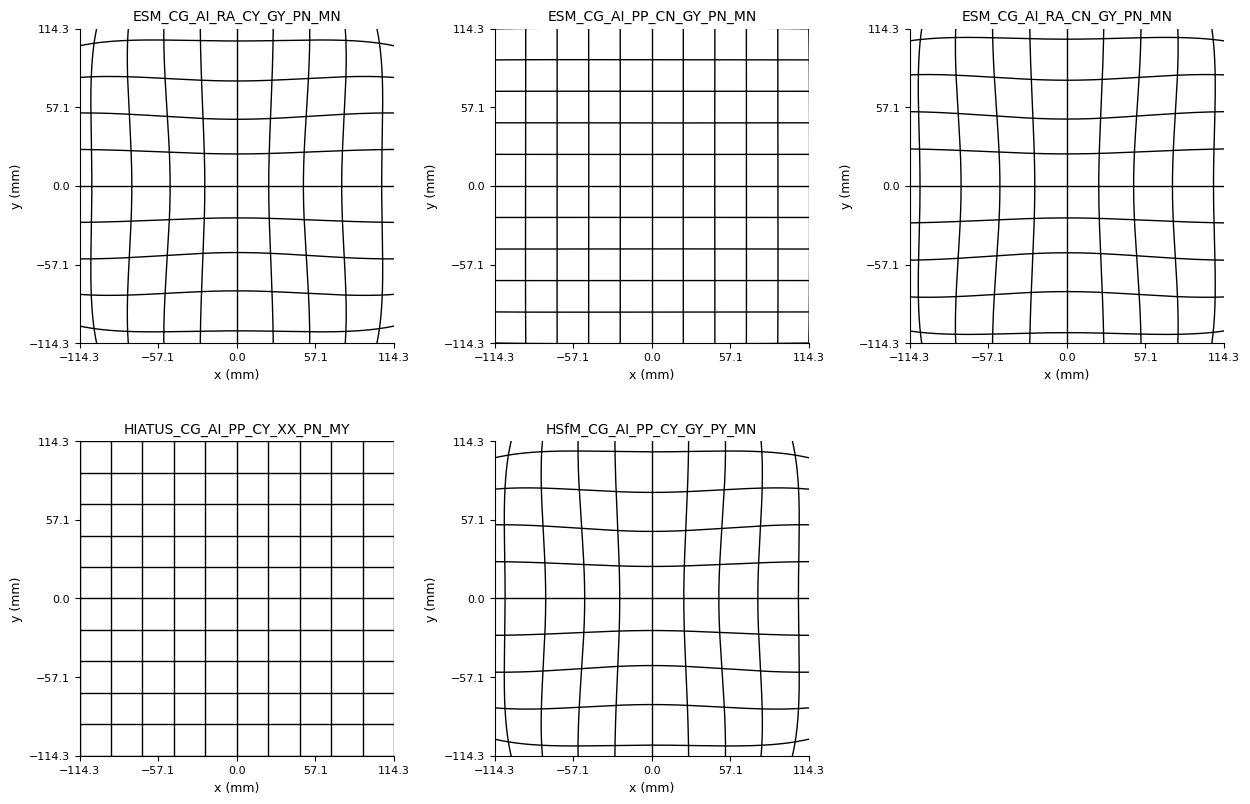

In [12]:
history.postprocessing.plotting.plot_distortion_grids(intrinsics_df, site='CG', viz_gain=1000)

### Extract extrinsics information
- If no file was found a warning is raised.

In [13]:
extrinsics_df = history.postprocessing.io.combine_extrinsics_files(files_dict)

In [14]:
# extrinsics_df

In [15]:
# extrinsics_df.to_csv('extrinsics_df.csv',index=False)

### Plot extrinsics information

In [16]:
initial_extrinsics_path = '/Volumes/backup/data/history/data/casa_grande/aerial_images/1978_09_06/camera_model_extrinsics.csv'

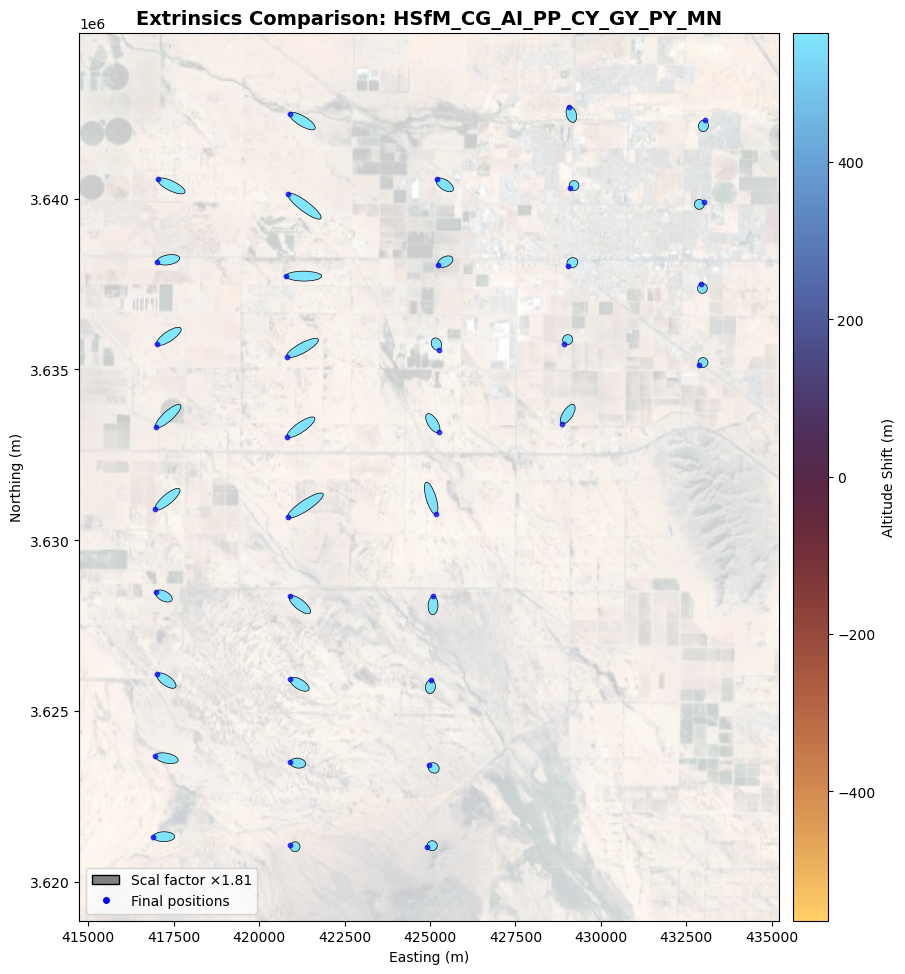

In [17]:
history.postprocessing.plotting.plot_extrinsics_comparison(extrinsics_df, 
                                 experiment_code = 'HSfM_CG_AI_PP_CY_GY_PY_MN', 
                                 initial_extrinsics_path = initial_extrinsics_path,
                                 plot_ovals=True,
                                 oval_alpha = 1,
                                 basemap_alpha = 0.2,
                                 basemap_xyz = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}",
                                 verbose=False
                                )

### Helper function to filter experiment data

In [18]:
# filtered_df = tools.filter_experiment_data(extrinsics_df, site='CG', images='PP', dataset='AI')
# filtered_df = filtered_df[filtered_df['experiment_code'] == 'HSfM_CG_AI_PP_CY_GY_PY_MN']
# filtered_df

# filtered_df = tools.filter_experiment_data(intrinsics_df, site='CG', images='PP', dataset='AI')
# filtered_df = filtered_df[filtered_df['experiment_code'] == 'HSfM_CG_AI_PP_CY_GY_PY_MN']
# filtered_df